In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import norm
df = pd.read_excel('Breast-cancer-mod.xlsx')

In [93]:
df.shape

(592, 32)

In [94]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df = df.loc[:, ~df.columns.str.contains('worst')]
# columns_to_keep = [col for col in df.columns if not col.endswith('worst')]
# df = df[columns_to_keep]
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
587    926424         M        21.56         22.39          142.00     1479.0   
588    926682         M        20.13         28.25          131.20     1261.0   
589    926954         M        16.60         28.08          108.30      858.1   
590    927241         M        20.60         29.33          140.10     1265.0   
591     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
587          0.11100           0.11590         0.24390              0.13890   
588          0.09780           0.10340         0.14400              0.09791   
589          0.08455           0.10230         0.09251              0.05302   
590          0.11780           0.27700         0.35140              0.15200   
591          0.05263           0.04362         0.00000              0.00000   

     ...  radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
0    ...     1.0950      0.9053         8.589   153.40       0.006399   
1    ...     0.5435      0.7339         3.398    74.08       0.005225   
2    ...     0.7456      0.7869         4.585    94.03       0.006150   
3    ...     0.4956      1.1560         3.445    27.23       0.009110   
4    ...     0.7572      0.7813         5.438    94.44       0.011490   
..   ...        ...         ...           ...      ...            ...   
587  ...     1.1760      1.2560         7.673   158.70       0.010300   
588  ...     0.7655      2.4630         5.203    99.04       0.005769   
589  ...     0.4564      1.0750         3.425    48.55       0.005903   
590  ...     0.7260      1.5950         5.772    86.22       0.006522   
591  ...     0.3857      1.4280         2.548    19.15       0.007189   

     compactness_se  concavity_se  concave points_se  symmetry_se  \
0           0.04904       0.05373            0.01587      0.03003   
1           0.01308       0.01860            0.01340      0.01389   
2           0.04006       0.03832            0.02058      0.02250   
3           0.07458       0.05661            0.01867      0.05963   
4           0.02461       0.05688            0.01885      0.01756   
..              ...           ...                ...          ...   
587         0.02891       0.05198            0.02454      0.01114   
588         0.02423       0.03950            0.01678      0.01898   
589         0.03731       0.04730            0.01557      0.01318   
590         0.06158       0.07117            0.01664      0.02324   
591         0.00466       0.00000            0.00000      0.02676   

     fractal_dimension_se  
0                0.006193  
1                0.003532  
2                0.004571  
3                0.009208  
4                0.005115  
..                    ...  
587              0.004239  
588              0.002498  
589              0.003892  
590              0.006185  
591              0.002783  

[592 rows x 22 columns]

In [95]:
duplicates = df.duplicated()
duplicate_rows = df[duplicates]
print(duplicate_rows)
# 20 duplicated rows

          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
24    851509         M       21.160         23.04          137.20     1404.0   
31    853201         M       17.570         15.05          115.00      955.1   
45    855625         M       19.070         24.81          128.30     1104.0   
65    858981         B        8.598         20.98           54.66      221.8   
111   863031         B       11.640         18.33           75.17      412.5   
121   864685         B       11.930         21.53           76.53      438.6   
141   867739         M       18.450         21.91          120.20     1075.0   
152   869254         B       10.750         14.97           68.26      355.3   
189   873592         M       27.220         21.87          182.10     2250.0   
212   878796         M       23.290         26.67          158.90     1685.0   
282  8910721         B       14.290         16.82           90.30      632.6   
321    89346         B        9.000     

In [96]:
df = df.drop_duplicates()
df
# 20 rows of duplicates removed

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
587    926424         M        21.56         22.39          142.00     1479.0   
588    926682         M        20.13         28.25          131.20     1261.0   
589    926954         M        16.60         28.08          108.30      858.1   
590    927241         M        20.60         29.33          140.10     1265.0   
591     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
587          0.11100           0.11590         0.24390              0.13890   
588          0.09780           0.10340         0.14400              0.09791   
589          0.08455           0.10230         0.09251              0.05302   
590          0.11780           0.27700         0.35140              0.15200   
591          0.05263           0.04362         0.00000              0.00000   

     ...  radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
0    ...     1.0950      0.9053         8.589   153.40       0.006399   
1    ...     0.5435      0.7339         3.398    74.08       0.005225   
2    ...     0.7456      0.7869         4.585    94.03       0.006150   
3    ...     0.4956      1.1560         3.445    27.23       0.009110   
4    ...     0.7572      0.7813         5.438    94.44       0.011490   
..   ...        ...         ...           ...      ...            ...   
587  ...     1.1760      1.2560         7.673   158.70       0.010300   
588  ...     0.7655      2.4630         5.203    99.04       0.005769   
589  ...     0.4564      1.0750         3.425    48.55       0.005903   
590  ...     0.7260      1.5950         5.772    86.22       0.006522   
591  ...     0.3857      1.4280         2.548    19.15       0.007189   

     compactness_se  concavity_se  concave points_se  symmetry_se  \
0           0.04904       0.05373            0.01587      0.03003   
1           0.01308       0.01860            0.01340      0.01389   
2           0.04006       0.03832            0.02058      0.02250   
3           0.07458       0.05661            0.01867      0.05963   
4           0.02461       0.05688            0.01885      0.01756   
..              ...           ...                ...          ...   
587         0.02891       0.05198            0.02454      0.01114   
588         0.02423       0.03950            0.01678      0.01898   
589         0.03731       0.04730            0.01557      0.01318   
590         0.06158       0.07117            0.01664      0.02324   
591         0.00466       0.00000            0.00000      0.02676   

     fractal_dimension_se  
0                0.006193  
1                0.003532  
2                0.004571  
3                0.009208  
4                0.005115  
..                    ...  
587              0.004239  
588              0.002498  
589              0.003892  
590              0.006185  
591              0.002783  

[572 rows x 22 columns]

In [97]:
duplicates_id = df.duplicated(subset=['id'])
duplicate_id_rows = df[duplicates_id]
print(duplicate_id_rows)
# 3 duplicated rows based on id -> 3 similar records that need to be merged

def merge_rows(group):
    merged_row = {}
    for column in group.columns:
        if pd.notna(group[column].iloc[0]):
            merged_row[column] = group[column].iloc[0]
        elif len(group) > 1 and pd.notna(group[column].iloc[1]):
            merged_row[column] = group[column].iloc[1]
        else:
            merged_row[column] = np.nan
    return pd.Series(merged_row)
    
# Apply the custom function to each group of rows with the same 'id'
df = df.groupby('id', group_keys=False).apply(merge_rows).reset_index(drop=True)
# df = df.drop('id', axis=1)
print(df)


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
244  88206102         M          NaN         27.81           134.4     1319.0   
309    891936         B        10.91           NaN             NaN        NaN   
378   9010872         B        16.50         18.29             NaN      838.1   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
244          0.09159           0.10740         0.15540                  NaN   
309          0.08518           0.04721         0.01236              0.01369   
378          0.09686           0.08468             NaN              0.04835   

     ...  radius_se  texture_se  perimeter_se  area_se  smoothness_se  \
244  ...     0.5240       1.189         3.767    70.01       0.005020   
309  ...     0.1753       1.027         1.267    11.09       0.003478   
378  ...     0.3389       1.439         2.344    33.58       0.007257   

     compactness_se  concavity_se  concave points_se  symmetry_se

In [98]:
missing_data_summary = pd.DataFrame({
    'Variable': df.columns,
    'Missing Values': df.isnull().sum(),
    'Percentage Missing': (df.isnull().sum() / len(df)) * 100
})

# Sort the summary by the percentage of missing values in descending order
missing_data_summary = missing_data_summary.sort_values(by='Percentage Missing', ascending=False)

# Print the summary
print("Missing Data Summary:")
print(missing_data_summary)

Missing Data Summary:
                                      Variable  Missing Values  \
fractal_dimension_mean  fractal_dimension_mean               1   
radius_mean                        radius_mean               1   
perimeter_mean                  perimeter_mean               1   
area_mean                            area_mean               1   
smoothness_mean                smoothness_mean               1   
compactness_mean              compactness_mean               1   
concave points_mean        concave points_mean               1   
symmetry_mean                    symmetry_mean               1   
area_se                                area_se               0   
symmetry_se                        symmetry_se               0   
concave points_se            concave points_se               0   
concavity_se                      concavity_se               0   
compactness_se                  compactness_se               0   
smoothness_se                    smoothness_se        

In [99]:
# Calculate the mean for numeric columns only
numeric_mean = df.select_dtypes(include=np.number).mean()

# Fill NaN values with the mean for each numeric column
df.fillna(numeric_mean, inplace=True)
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0         8670         M        15.46         19.48          101.70   
1         8913         B        12.89         13.12           81.89   
2         8915         B        14.96         19.10           97.03   
3         9047         B        12.94         16.17           83.18   
4        85715         M        13.17         18.66           85.98   
..         ...       ...          ...           ...             ...   
564  911157302         M        21.10         20.52          138.10   
565  911296201         M        17.08         27.15          111.20   
566  911296202         M        27.42         26.27          186.90   
567  911320501         B        11.60         18.36           73.88   
568  911320502         B        13.17         18.22           84.28   

     area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0        748.9          0.10920           0.12230         0.14660   
1        515.9          0.06955           0.03729         0.02260   
2        687.3          0.08992           0.09823         0.05940   
3        507.6          0.09879           0.08836         0.03296   
4        534.6          0.11580           0.12310         0.12260   
..         ...              ...               ...             ...   
564     1384.0          0.09684           0.11750         0.15720   
565      930.9          0.09898           0.11100         0.10070   
566     2501.0          0.10840           0.19880         0.36350   
567      412.7          0.08508           0.05855         0.03367   
568      537.3          0.07466           0.05994         0.04859   

     concave points_mean  ...  radius_se  texture_se  perimeter_se  area_se  \
0                0.08087  ...     0.4743      0.7859        3.0940    48.31   
1                0.01171  ...     0.1532      0.4690        1.1150    12.68   
2                0.04819  ...     0.2877      0.9480        2.1710    24.87   
3                0.02390  ...     0.1458      0.9050        0.9975    11.36   
4                0.07340  ...     0.2871      0.8937        1.8970    24.25   
..                   ...  ...        ...         ...           ...      ...   
564              0.11550  ...     0.6643      1.3610        4.5420    81.89   
565              0.06431  ...     0.9291      1.1520        6.0510   115.20   
566              0.16890  ...     2.5470      1.3060       18.6500   542.20   
567              0.01777  ...     0.1816      0.7656        1.3030    12.89   
568              0.02870  ...     0.2023      0.6850        1.2360    16.89   

     smoothness_se  compactness_se  concavity_se  concave points_se  \
0         0.006240         0.01484       0.02813           0.010930   
1         0.004731         0.01345       0.01652           0.005905   
2         0.005332         0.02115       0.01536           0.011870   
3         0.002887         0.01285       0.01613           0.007308   
4         0.006532         0.02336       0.02905           0.012150   
..             ...             ...           ...                ...   
564       0.005467         0.02075       0.03185           0.014660   
565       0.008740         0.02219       0.02721           0.014580   
566       0.007650         0.05374       0.08055           0.025980   
567       0.006709         0.01701       0.02080           0.007497   
568       0.005969         0.01493       0.01564           0.008463   

     symmetry_se  fractal_dimension_se  
0        0.01397              0.002461  
1        0.01619              0.002081  
2        0.01522              0.002815  
3        0.01870              0.001972  
4        0.01743              0.003643  
..           ...                   ...  
564      0.01029              0.002205  
565      0.02045              0.004417  
566      0.01697              0.004558  
567      0.02124              0.002768  
568      0.01093              0.001672  

[569 rows x 22 columns]

In [100]:
column_data_types = df.dtypes

In [101]:
numerical_columns = column_data_types[column_data_types != 'object'].index.tolist()
categorical_columns = column_data_types[column_data_types == 'object'].index.tolist()

print("Numerical Columns:", numerical_columns)
print("Categorical Columns:", categorical_columns)

Numerical Columns: ['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']
Categorical Columns: ['diagnosis']


# Codes for frequency/density and normal distribution chart 

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  radius_se               569 non-null    float64
 13  texture_se              569 non-null    float64
 14  perimeter_se            569 non-null    fl

/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


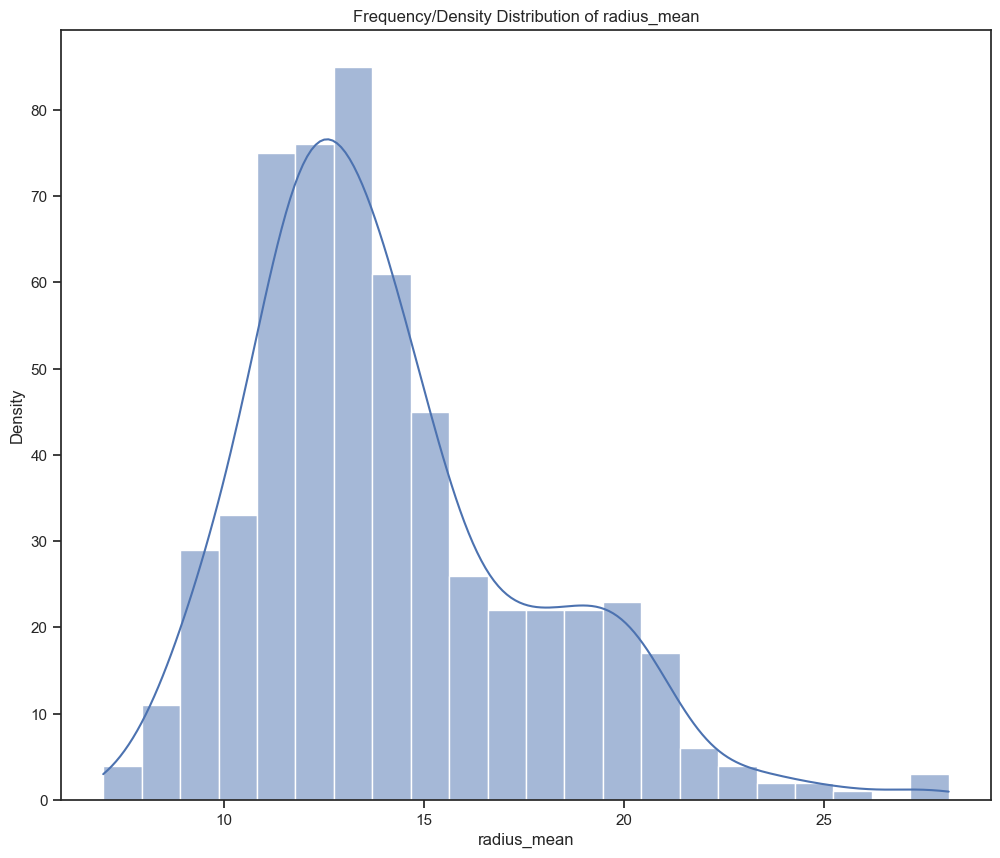


--- Central Tendency ---
Mean: 14.129276408450703
Median: 13.38
Mode: 12.34
--- Variation ---
Variance: 12.416678890147663
Standard Deviation: 3.5237308197630055
--- Shape ---
Kurtosis: 0.8447602125901423
Skewness: 0.9409969345751014


/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


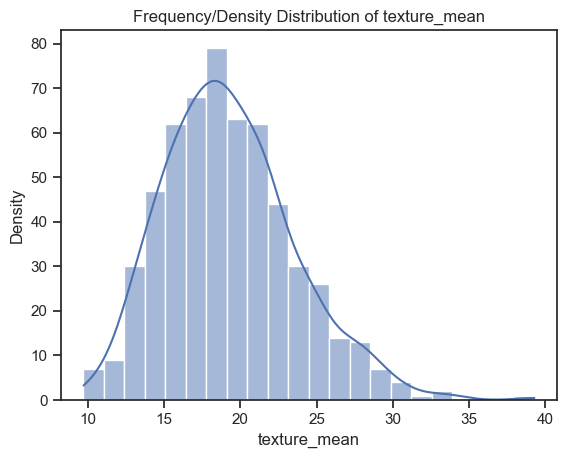


--- Central Tendency ---
Mean: 19.289648506151142
Median: 18.84
Mode: 14.93
--- Variation ---
Variance: 18.49890867905146
Standard Deviation: 4.301035768166949
--- Shape ---
Kurtosis: 0.7583189723727757
Skewness: 0.6504495420828157


/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


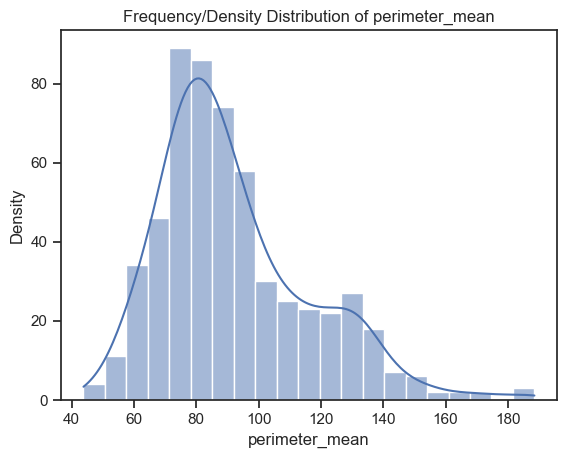


--- Central Tendency ---
Mean: 91.9594542253521
Median: 86.24
Mode: 82.61
--- Variation ---
Variance: 590.3882678359328
Standard Deviation: 24.297906655428832
--- Shape ---
Kurtosis: 0.9744888636623252
Skewness: 0.9919488910424449


/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


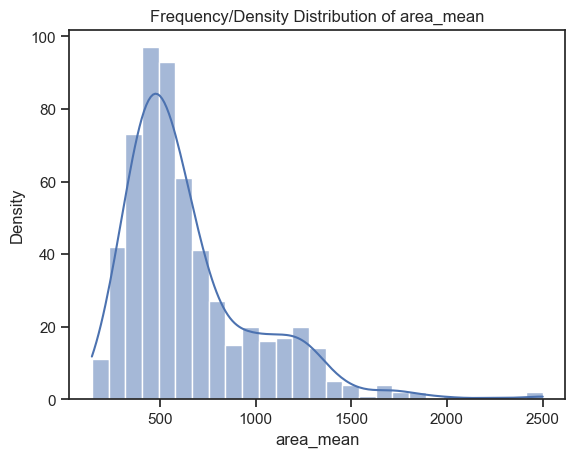


--- Central Tendency ---
Mean: 654.8117957746479
Median: 551.1
Mode: 512.2
--- Variation ---
Variance: 123840.15368128222
Standard Deviation: 351.9092975203727
--- Shape ---
Kurtosis: 3.6541252692777855
Skewness: 1.6464578998401347


/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


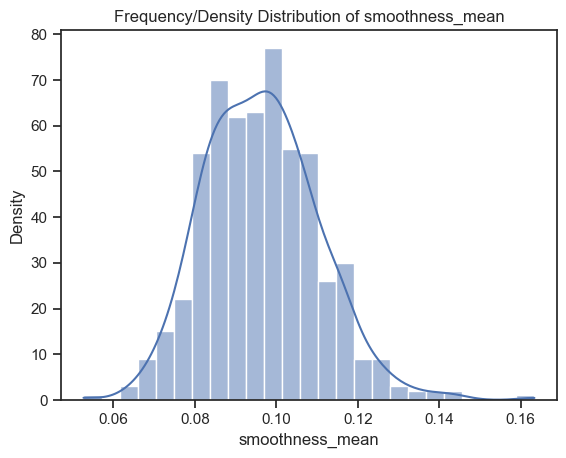


--- Central Tendency ---
Mean: 0.09634454225352113
Median: 0.09587
Mode: 0.1007
--- Variation ---
Variance: 0.00019765875084680617
Standard Deviation: 0.014059116289682157
--- Shape ---
Kurtosis: 0.8632736494142232
Skewness: 0.4597280190577646


/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


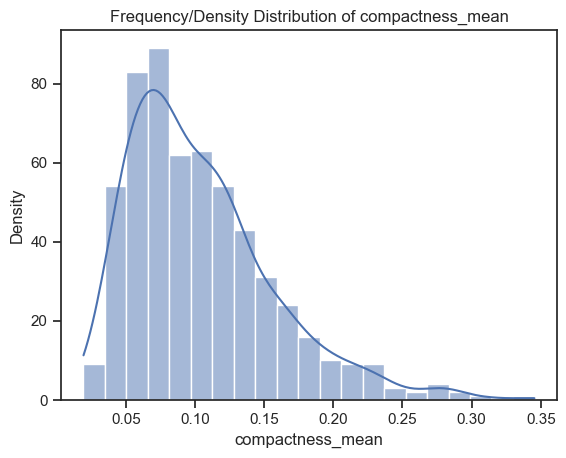


--- Central Tendency ---
Mean: 0.1041468661971831
Median: 0.09263
Mode: 0.1147
--- Variation ---
Variance: 0.002767746460601815
Standard Deviation: 0.052609376166248306
--- Shape ---
Kurtosis: 1.706112028337813
Skewness: 1.1988233451242882


/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


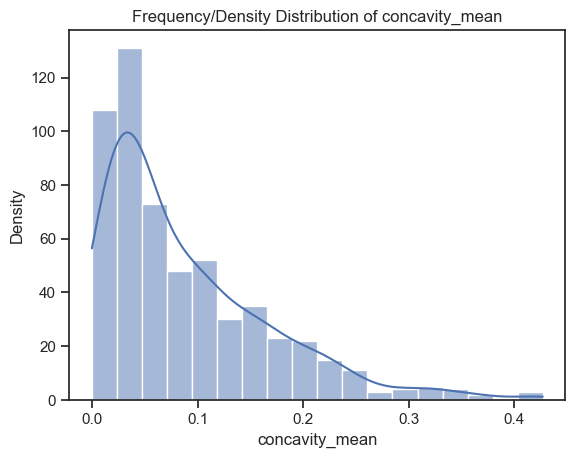


--- Central Tendency ---
Mean: 0.0887993158172232
Median: 0.06154
Mode: 0.0
--- Variation ---
Variance: 0.006355247900423129
Standard Deviation: 0.07971980870789348
--- Shape ---
Kurtosis: 1.9986375291042133
Skewness: 1.401179738948672


/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


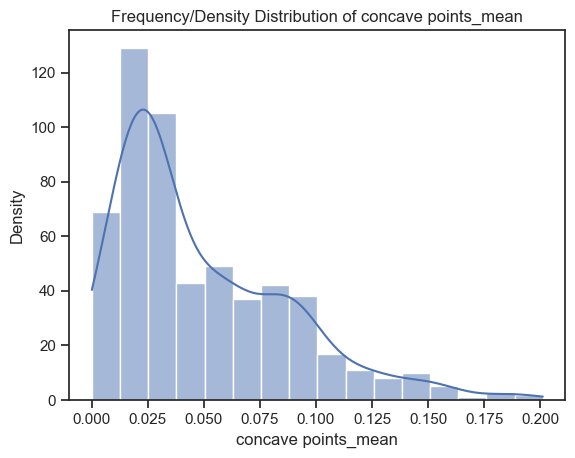


--- Central Tendency ---
Mean: 0.04895321126760563
Median: 0.0337
Mode: 0.0
--- Variation ---
Variance: 0.0015050004723638167
Standard Deviation: 0.03879433557059351
--- Shape ---
Kurtosis: 1.0658870636928057
Skewness: 1.1695265334230445


/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


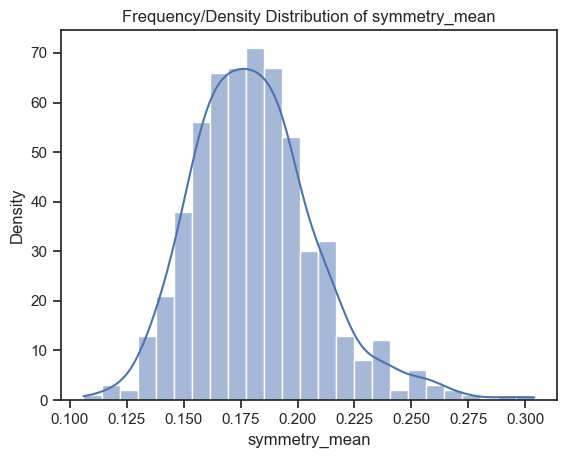


--- Central Tendency ---
Mean: 0.18110598591549293
Median: 0.1792
Mode: 0.1601
--- Variation ---
Variance: 0.0007497662669857171
Standard Deviation: 0.02738186018125352
--- Shape ---
Kurtosis: 1.3111299183794882
Skewness: 0.7315817574898337


/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


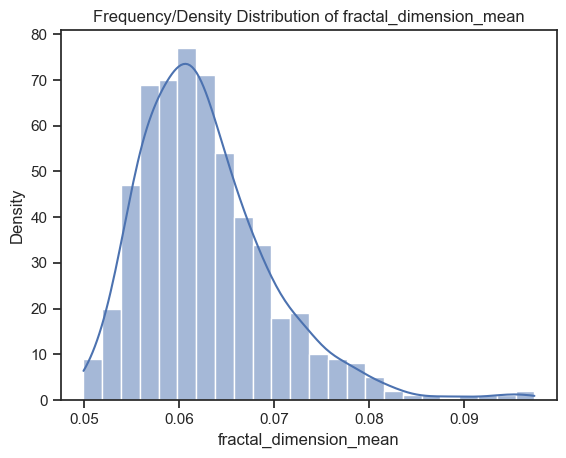


--- Central Tendency ---
Mean: 0.06280640845070422
Median: 0.06155
Mode: 0.05667
--- Variation ---
Variance: 4.980467336837929e-05
Standard Deviation: 0.00705724261793367
--- Shape ---
Kurtosis: 3.009547393336942
Skewness: 1.3030938004308703


In [103]:
mean_columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

# Plot frequency/density distribution
plt.figure(figsize=(12, 10))
for i, column in enumerate(mean_columns, start=1):
    sns.histplot(data=df, x=column, kde=True)
    plt.xlabel(column)
    plt.ylabel('Density')   
    plt.title(f'Frequency/Density Distribution of {column}')
    plt.show()
# Calculate descriptive statistics
    mean = df[column].mean()
    median = df[column].median()
    mode = df[column].mode().iloc[0]
    variance = df[column].var()
    std_deviation = df[column].std()
    skewness = df[column].skew()
    kurtosis = df[column].kurtosis()
# Print descriptive statistics
    print("\n--- Central Tendency ---")
    print("Mean:", mean)
    print("Median:", median)
    print("Mode:", mode)
    print("--- Variation ---")
    print("Variance:", variance)
    print("Standard Deviation:", std_deviation)
    print("--- Shape ---")
    print("Kurtosis:", kurtosis)
    print("Skewness:", skewness)

# CODES FOR BOXPLOT 

/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

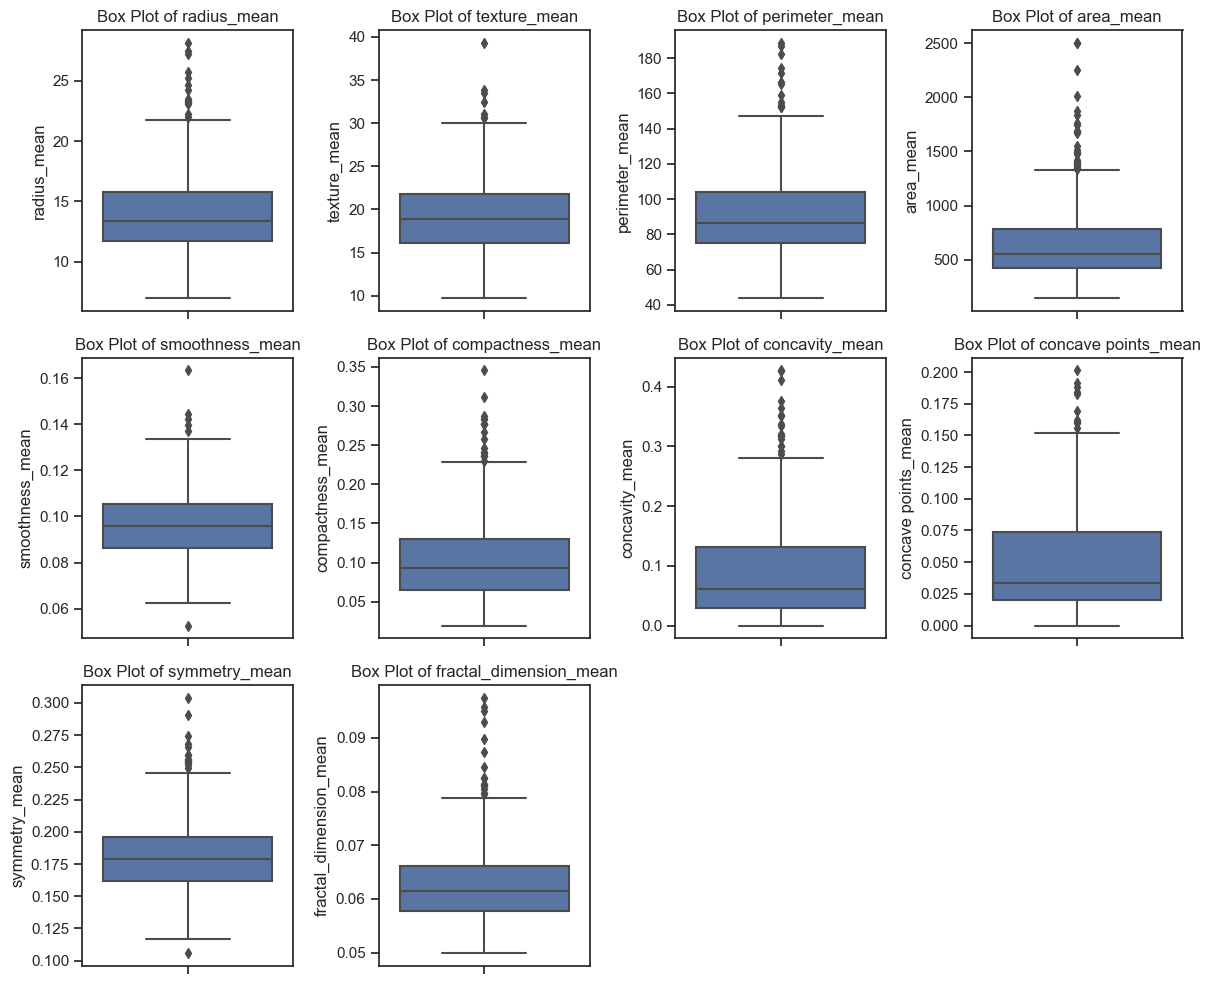

In [104]:
mean_columns = [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
    'smoothness_mean', 'compactness_mean', 'concavity_mean',
    'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'
]

# Create a grid of box plots
plt.figure(figsize=(12, 10))
for i, column in enumerate(mean_columns, start=1):
    plt.subplot(3, 4, i)  # 4 rows, 3 columns grid
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()


In [105]:
outliers = {}
for column in mean_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    potential_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers[column] = potential_outliers


/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

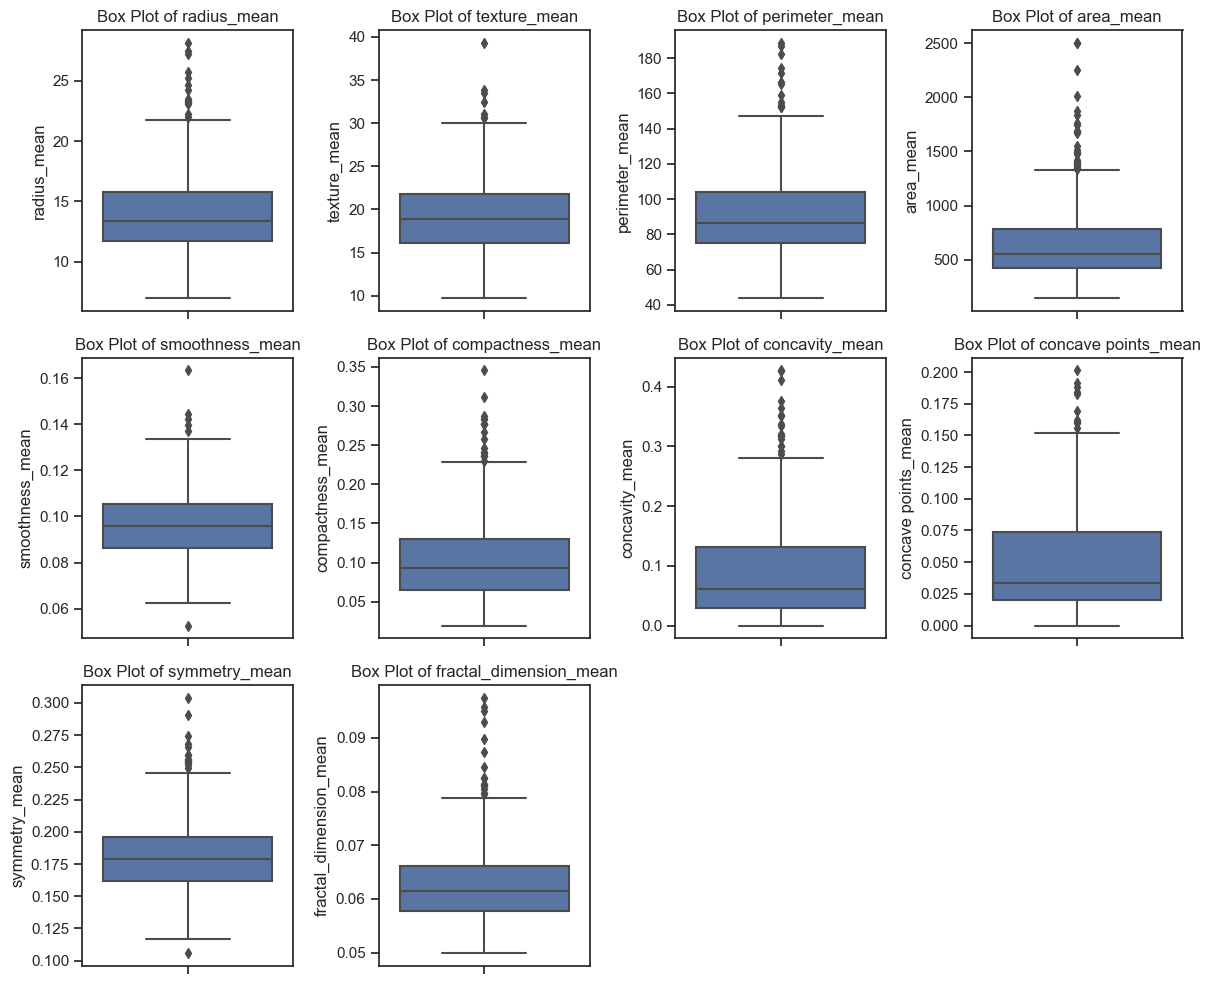

In [106]:
# boxplots after cleaning
plt.figure(figsize=(12, 10))
for i, column in enumerate(mean_columns, start=1):
    plt.subplot(3, 4, i)  # 4 rows, 3 columns grid
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)
    plt.xlabel('')

plt.tight_layout()
plt.show()

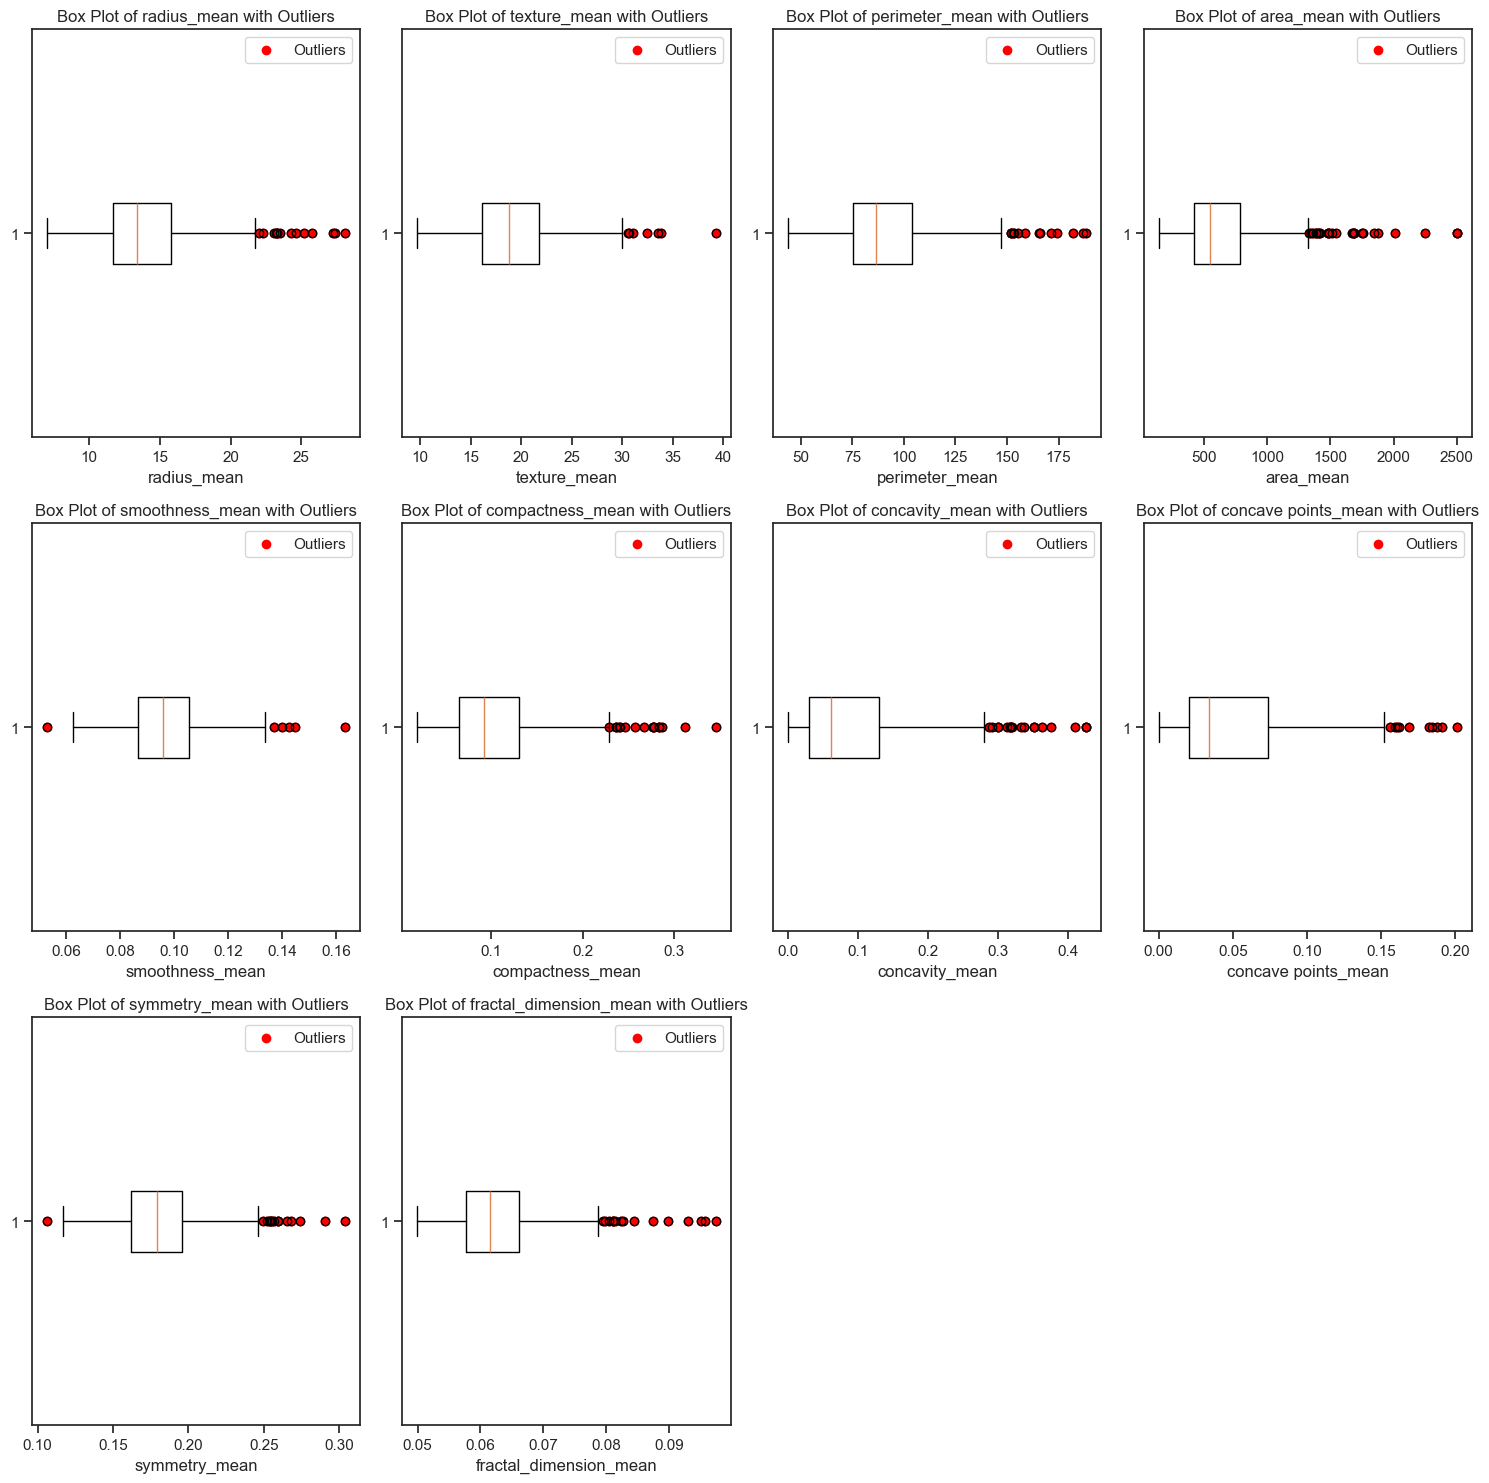

In [107]:
num_rows = (len(outliers) + 3) // 4  # 3 columns

plt.figure(figsize=(15, 5 * num_rows))

for i, (column, potential_outliers) in enumerate(outliers.items(), start=1):
    plt.subplot(num_rows, 4, i)
    plt.boxplot(df[column], vert=False)
    plt.scatter(potential_outliers[column], [1] * len(potential_outliers), color='red', label='Outliers', marker='o')
    plt.title(f'Box Plot of {column} with Outliers')
    plt.xlabel(column)
    plt.legend()

plt.tight_layout()
plt.show()

In [108]:
# casting outliers to mean of col
for column in mean_columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliersBoolean = (df[column] < lower_bound) | (df[column] > upper_bound)

    df.loc[outliersBoolean, column] = df[column].mean()

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  radius_se               569 non-null    float64
 13  texture_se              569 non-null    float64
 14  perimeter_se            569 non-null    fl

# CODES FOR SCATTER

In [110]:
mean_columns = [col for col in df.columns if 'mean' in col]
se_columns = [col for col in df.columns if 'se' in col]

#sort to ensure that the same variables are paired eg. radius_mean && radius_se
mean_columns.sort() 
se_columns.sort()

print(mean_columns, '\n')
print(se_columns)



['area_mean', 'compactness_mean', 'concave points_mean', 'concavity_mean', 'fractal_dimension_mean', 'perimeter_mean', 'radius_mean', 'smoothness_mean', 'symmetry_mean', 'texture_mean'] 

['area_se', 'compactness_se', 'concave points_se', 'concavity_se', 'fractal_dimension_se', 'perimeter_se', 'radius_se', 'smoothness_se', 'symmetry_se', 'texture_se']


/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

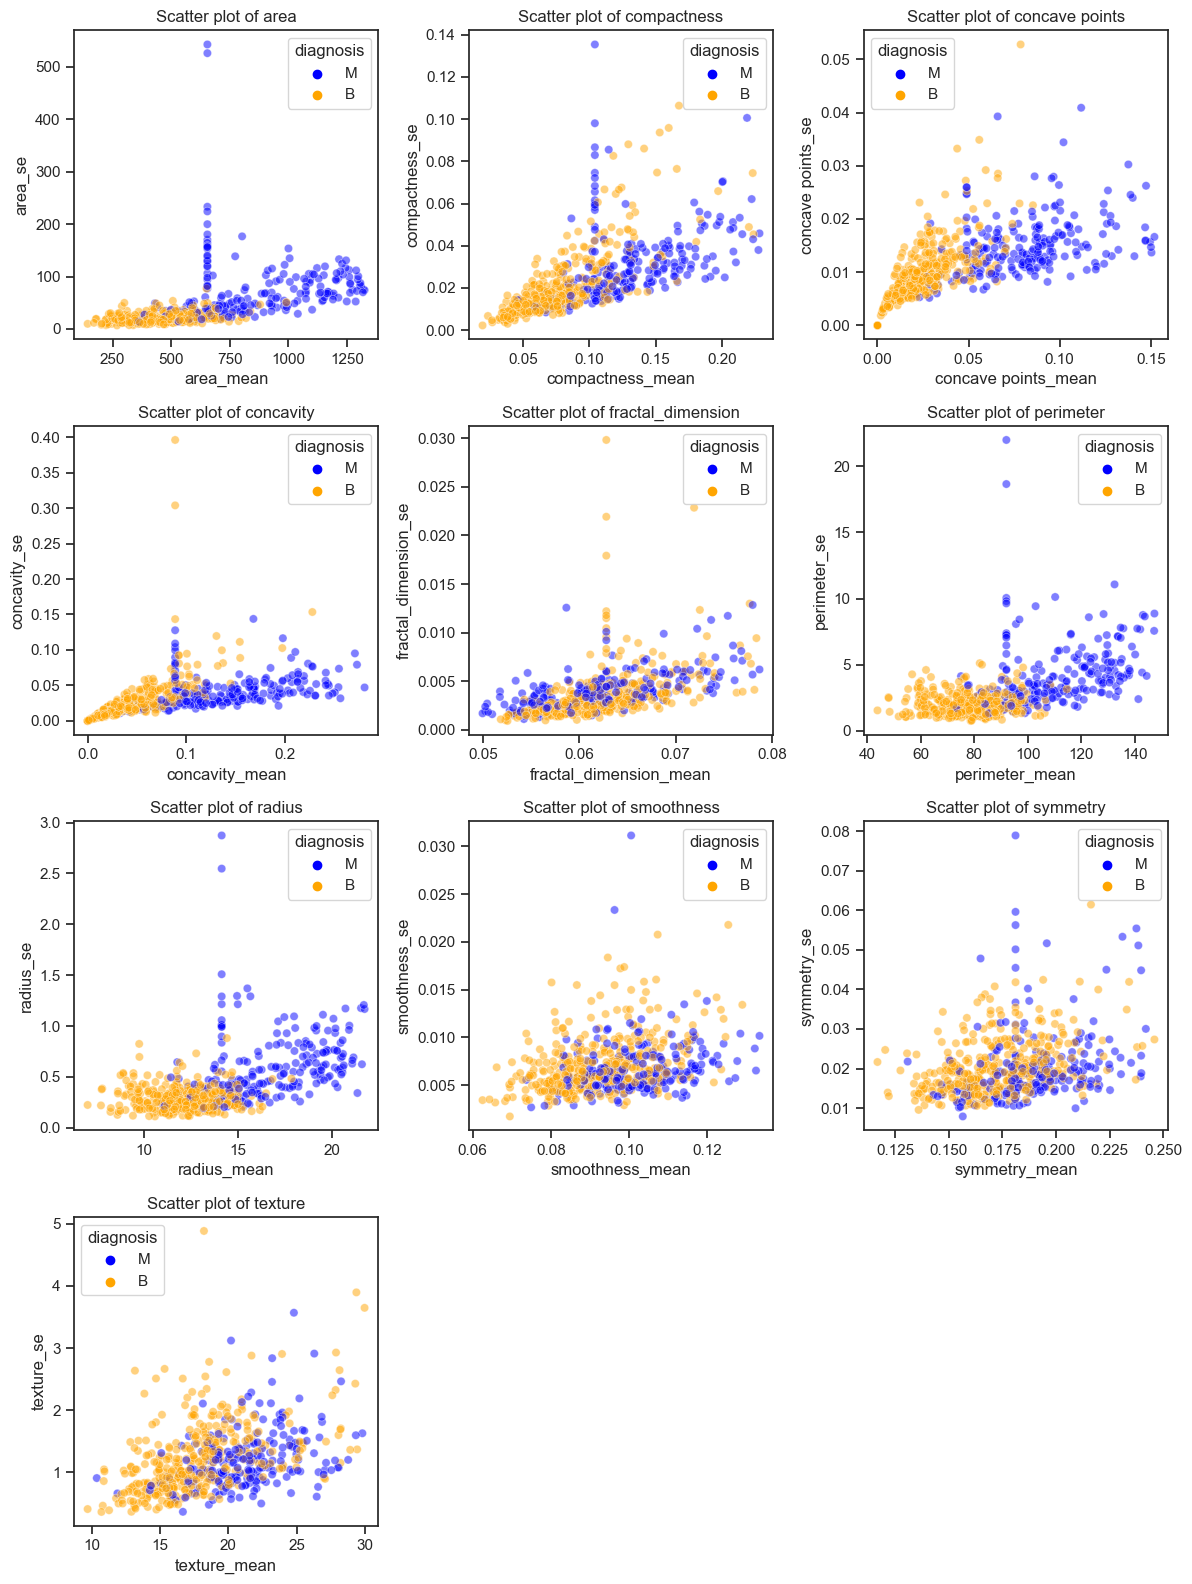

In [111]:
num_rows = (len(mean_columns) + 2) // 3  # 3 columns

plt.figure(figsize=(12, 4 * num_rows))

for i in range(len(mean_columns)):
    plt.subplot(num_rows, 3, i+ 1)
    sns.scatterplot(
        data=df, 
        x=mean_columns[i], 
        y=se_columns[i], 
        hue='diagnosis', 
        palette={'M': 'blue', 'B': 'orange'},
        alpha=0.5
    )
    plt.title(f'Scatter plot of {mean_columns[i][:-5]}')
    plt.xlabel(f'{mean_columns[i]}')
    plt.ylabel(se_columns[i])

plt.tight_layout()
plt.show()

the seperation of the orange and blue dots in fields such as radius or concavity suggest that this field may be a good predictor of whether the individual's growth is benign or malignamt

# CODES FOR NORMAL DISTRIBUTION CURVES

In [112]:
malignant_data = df[df['diagnosis'] == 'M']
benign_data = df[df['diagnosis'] == 'B']

print(malignant_data)
print(benign_data)

            id diagnosis  radius_mean  texture_mean  perimeter_mean  \
0         8670         M    15.460000         19.48      101.700000   
4        85715         M    13.170000         18.66       85.980000   
5        86208         M    20.260000         23.03      132.400000   
7        86355         M    14.129276         19.67       91.959454   
10       86517         M    18.660000         17.12      121.400000   
..         ...       ...          ...           ...             ...   
560  881046502         M    20.580000         22.14      134.700000   
561  881094802         M    17.420000         25.56      114.500000   
564  911157302         M    21.100000         20.52      138.100000   
565  911296201         M    17.080000         27.15      111.200000   
566  911296202         M    14.129276         26.27       91.959454   

       area_mean  smoothness_mean  compactness_mean  concavity_mean  \
0     748.900000          0.10920          0.122300        0.146600   
4    

In [113]:
features = ['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'compactness_mean']
print(features)

['radius_mean', 'texture_mean', 'area_mean', 'smoothness_mean', 'concavity_mean', 'compactness_mean']


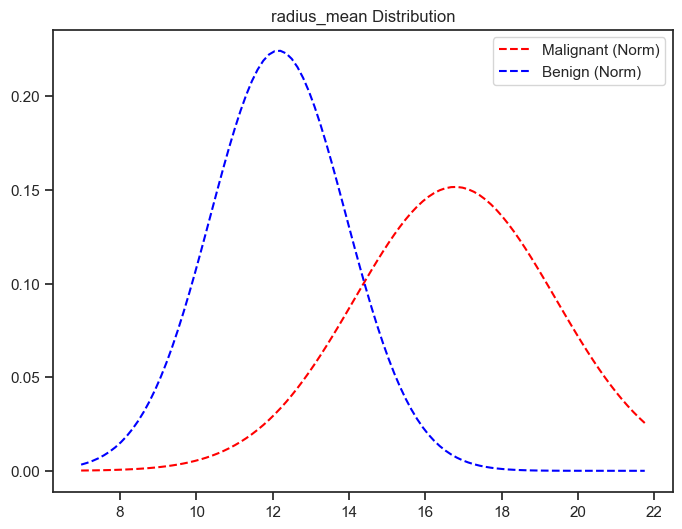

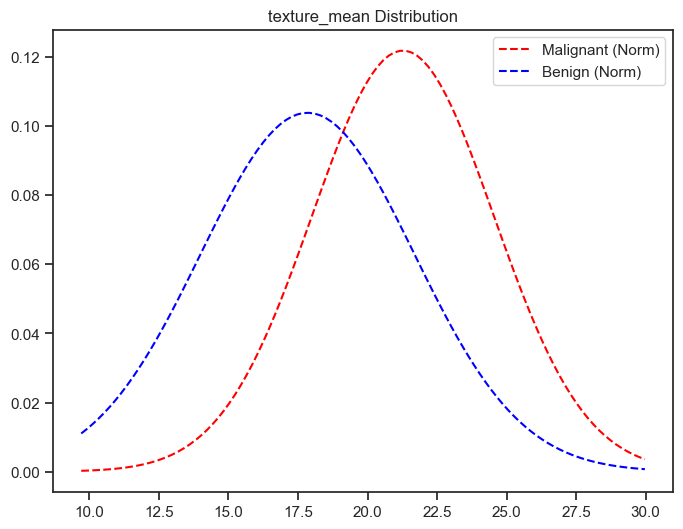

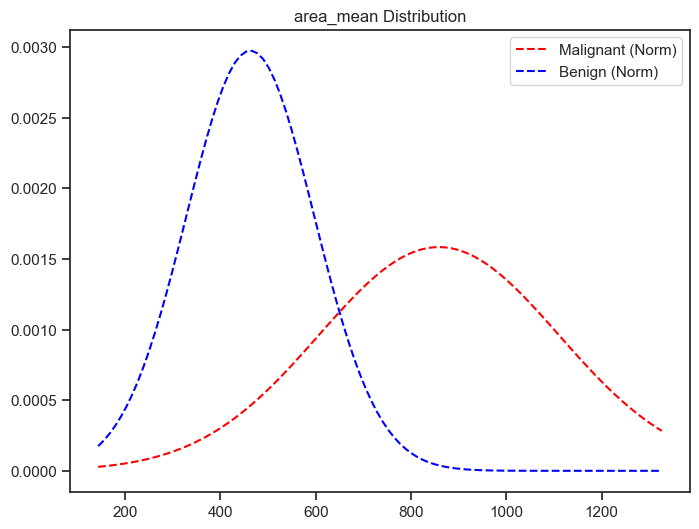

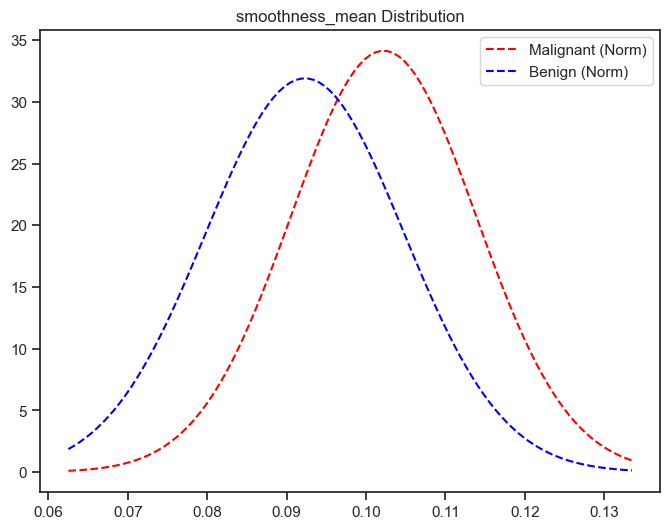

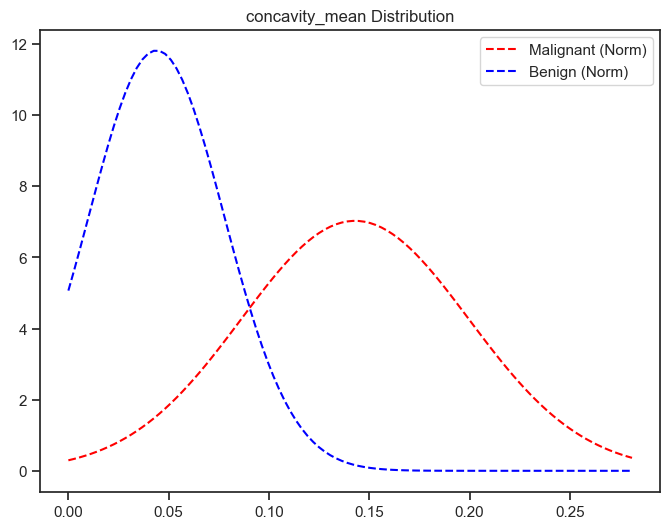

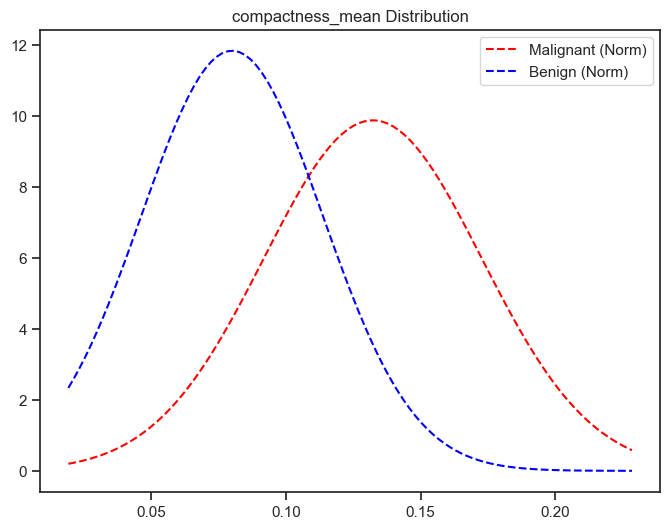

In [114]:
for feature in features:
    fig, ax = plt.subplots(figsize=(8, 6))
        
    mean_malignant, std_dev_malignant = norm.fit(malignant_data[feature])
    mean_benign, std_dev_benign = norm.fit(benign_data[feature])
    x = np.linspace(min(df[feature]), max(df[feature]), 100)
    
    ax.plot(x, norm.pdf(x, mean_malignant, std_dev_malignant), color='red', linestyle='--', label='Malignant (Norm)')
    ax.plot(x, norm.pdf(x, mean_benign, std_dev_benign), color='blue', linestyle='--', label='Benign (Norm)')
    
    plt.title(f'{feature} Distribution')
    plt.legend()
    
    plt.show()

# CODES FOR R CORRELATION COEFFICIENT

                        radius_mean  texture_mean  perimeter_mean  area_mean  \
radius_mean                1.000000      0.303788        0.991525   0.942860   
texture_mean               0.303788      1.000000        0.312120   0.314719   
perimeter_mean             0.991525      0.312120        1.000000   0.936514   
area_mean                  0.942860      0.314719        0.936514   1.000000   
smoothness_mean            0.138548      0.011262        0.177505   0.131873   
compactness_mean           0.428220      0.216861        0.479007   0.405132   
concavity_mean             0.633154      0.314019        0.674525   0.607138   
concave points_mean        0.751529      0.284644        0.789499   0.722908   
symmetry_mean              0.132041      0.110371        0.162164   0.137690   
fractal_dimension_mean    -0.297954     -0.056689       -0.249187  -0.277346   

                        smoothness_mean  compactness_mean  concavity_mean  \
radius_mean                    0.138548   

/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

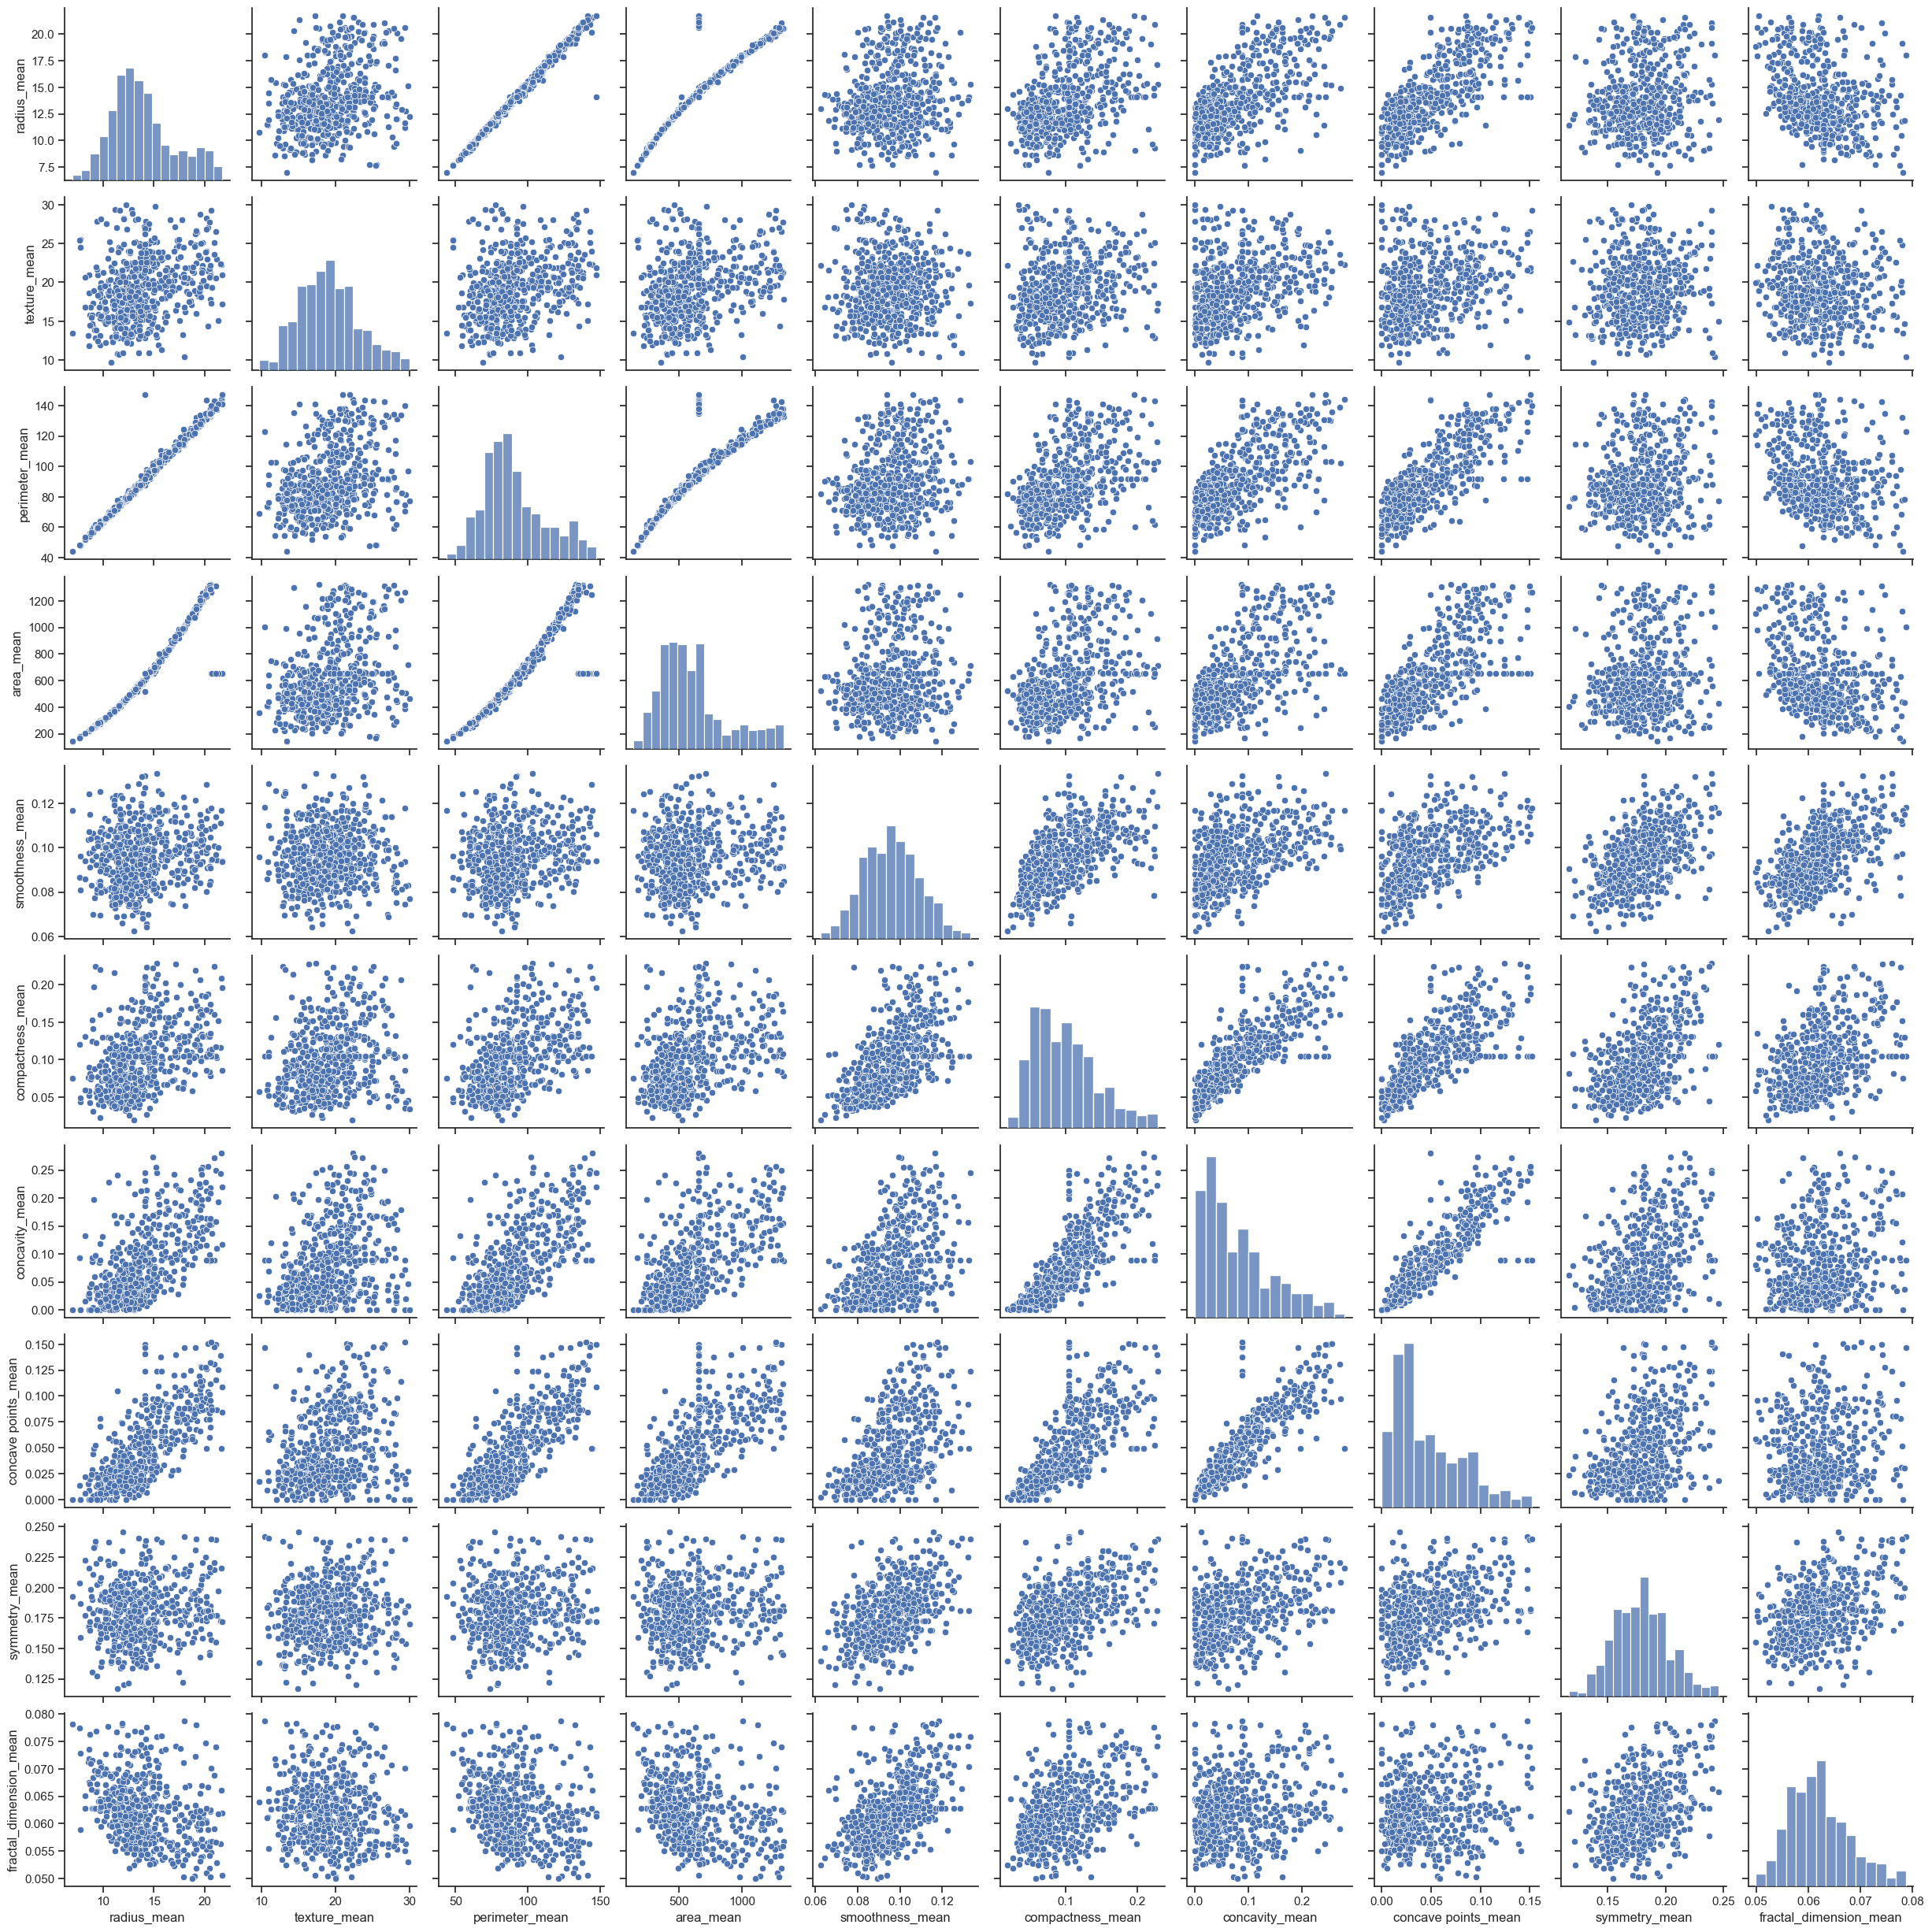

In [115]:
df_mean = df.loc[:, df.columns.str.contains('mean')]
correlation_matrix = df_mean.corr()
print(correlation_matrix)
sns.set(style="ticks")
sns.pairplot(df_mean)

# Show the plot
plt.show()

/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


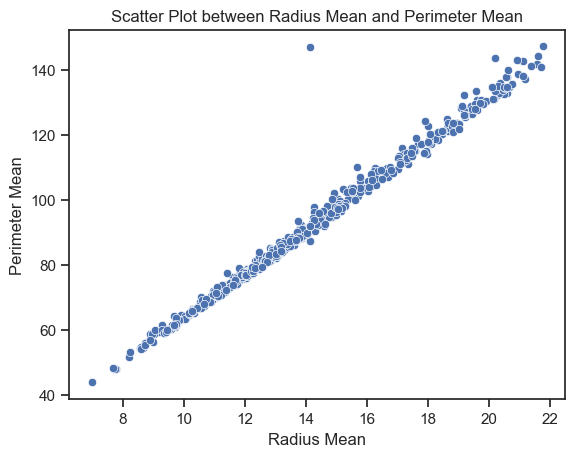

Pearson Correlation Coefficient (r): 0.9915


In [116]:
# Create a scatterplot between 'radius_mean' and 'perimeter_mean'
sns.scatterplot(data=df_mean, x='radius_mean', y='perimeter_mean')

# Set plot labels and title
plt.xlabel('Radius Mean')
plt.ylabel('Perimeter Mean')
plt.title('Scatter Plot between Radius Mean and Perimeter Mean')

# Show the plot
plt.show()

correlation_coefficient = df['radius_mean'].corr(df['perimeter_mean'])

# Print the correlation coefficient
print(f'Pearson Correlation Coefficient (r): {correlation_coefficient:.4f}')

/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


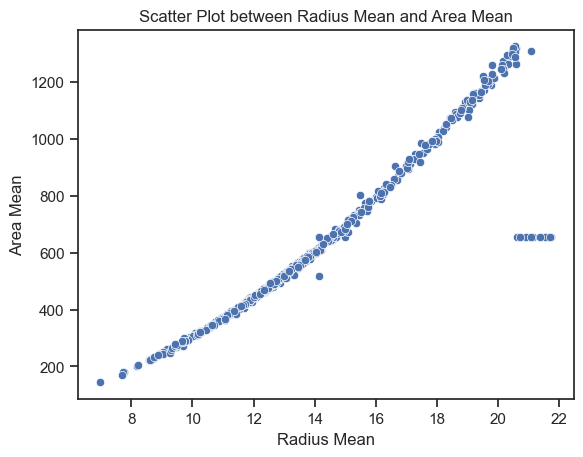

Pearson Correlation Coefficient (r): 0.9429


In [117]:
# Create a scatterplot between 'radius_mean' and 'perimeter_mean'
sns.scatterplot(data=df_mean, x='radius_mean', y='area_mean')

# Set plot labels and title
plt.xlabel('Radius Mean')
plt.ylabel('Area Mean')
plt.title('Scatter Plot between Radius Mean and Area Mean')

# Show the plot
plt.show()

correlation_coefficient = df['radius_mean'].corr(df['area_mean'])

# Print the correlation coefficient
print(f'Pearson Correlation Coefficient (r): {correlation_coefficient:.4f}')

/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/shinolim/myenv/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


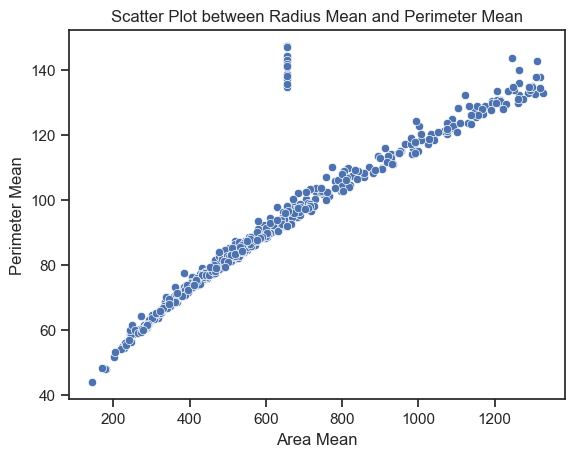

Pearson Correlation Coefficient (r): 0.9365


In [118]:
# Create a scatterplot between 'radius_mean' and 'perimeter_mean'
sns.scatterplot(data=df_mean, x='area_mean', y='perimeter_mean')

# Set plot labels and title
plt.xlabel('Area Mean')
plt.ylabel('Perimeter Mean')
plt.title('Scatter Plot between Radius Mean and Perimeter Mean')

# Show the plot
plt.show()

correlation_coefficient = df['area_mean'].corr(df['perimeter_mean'])

# Print the correlation coefficient
print(f'Pearson Correlation Coefficient (r): {correlation_coefficient:.4f}')

In [119]:
df = df.drop(['radius_mean','radius_se','perimeter_mean','perimeter_se'], axis=1)
df

id diagnosis  texture_mean   area_mean  smoothness_mean  \
0         8670         M         19.48  748.900000          0.10920   
1         8913         B         13.12  515.900000          0.06955   
2         8915         B         19.10  687.300000          0.08992   
3         9047         B         16.17  507.600000          0.09879   
4        85715         M         18.66  534.600000          0.11580   
..         ...       ...           ...         ...              ...   
564  911157302         M         20.52  654.811796          0.09684   
565  911296201         M         27.15  930.900000          0.09898   
566  911296202         M         26.27  654.811796          0.10840   
567  911320501         B         18.36  412.700000          0.08508   
568  911320502         B         18.22  537.300000          0.07466   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.12230        0.146600             0.080870         0.1931   
1             0.03729        0.022600             0.011710         0.1337   
2             0.09823        0.059400             0.048190         0.1879   
3             0.08836        0.032960             0.023900         0.1735   
4             0.12310        0.122600             0.073400         0.2128   
..                ...             ...                  ...            ...   
564           0.11750        0.157200             0.115500         0.1554   
565           0.11100        0.100700             0.064310         0.1793   
566           0.19880        0.088799             0.048953         0.2061   
567           0.05855        0.033670             0.017770         0.1516   
568           0.05994        0.048590             0.028700         0.1454   

     fractal_dimension_mean  texture_se  area_se  smoothness_se  \
0                   0.05796      0.7859    48.31       0.006240   
1                   0.05581      0.4690    12.68       0.004731   
2                   0.05852      0.9480    24.87       0.005332   
3                   0.06200      0.9050    11.36       0.002887   
4                   0.06777      0.8937    24.25       0.006532   
..                      ...         ...      ...            ...   
564                 0.05661      1.3610    81.89       0.005467   
565                 0.06281      1.1520   115.20       0.008740   
566                 0.05623      1.3060   542.20       0.007650   
567                 0.05859      0.7656    12.89       0.006709   
568                 0.05549      0.6850    16.89       0.005969   

     compactness_se  concavity_se  concave points_se  symmetry_se  \
0           0.01484       0.02813           0.010930      0.01397   
1           0.01345       0.01652           0.005905      0.01619   
2           0.02115       0.01536           0.011870      0.01522   
3           0.01285       0.01613           0.007308      0.01870   
4           0.02336       0.02905           0.012150      0.01743   
..              ...           ...                ...          ...   
564         0.02075       0.03185           0.014660      0.01029   
565         0.02219       0.02721           0.014580      0.02045   
566         0.05374       0.08055           0.025980      0.01697   
567         0.01701       0.02080           0.007497      0.02124   
568         0.01493       0.01564           0.008463      0.01093   

     fractal_dimension_se  
0                0.002461  
1                0.002081  
2                0.002815  
3                0.001972  
4                0.003643  
..                    ...  
564              0.002205  
565              0.004417  
566              0.004558  
567              0.002768  
568              0.001672  

[569 rows x 18 columns]

In [120]:
df = df.loc[:, ~df.columns.str.contains('se')]
df

# Convert the cleaned data to a CSV file
df.to_csv('Cleaned-Breast-cancer-mod.csv', index=False)
df = pd.read_csv('Cleaned-Breast-cancer-mod.csv')

In [121]:
#min-max normalization
mean_columns = [col for col in df.columns if 'mean' in col]

for column in mean_columns:
    min_val = df[column].min()
    max_val = df[column].max()
    df[column + '_norm'] = ((df[column] - min_val) / (max_val - min_val)) * (1 - 0) + 0

# Print the normalized DataFrame
print(df)
df.to_csv('Normalized-breast-cancer-mod.csv', index=False)

            id diagnosis  texture_mean   area_mean  smoothness_mean  \
0         8670         M         19.48  748.900000          0.10920   
1         8913         B         13.12  515.900000          0.06955   
2         8915         B         19.10  687.300000          0.08992   
3         9047         B         16.17  507.600000          0.09879   
4        85715         M         18.66  534.600000          0.11580   
..         ...       ...           ...         ...              ...   
564  911157302         M         20.52  654.811796          0.09684   
565  911296201         M         27.15  930.900000          0.09898   
566  911296202         M         26.27  654.811796          0.10840   
567  911320501         B         18.36  412.700000          0.08508   
568  911320502         B         18.22  537.300000          0.07466   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0             0.12230        0.146600             0.080870         0.1

In [122]:
#Remove mean variables
df = df.drop(columns=mean_columns)
df

id diagnosis  texture_mean_norm  area_mean_norm  \
0         8670         M           0.482231        0.511966   
1         8913         B           0.168312        0.314926   
2         8915         B           0.463475        0.459873   
3         9047         B           0.318855        0.307907   
4        85715         M           0.441757        0.330740   
..         ...       ...                ...             ...   
564  911157302         M           0.533564        0.432399   
565  911296201         M           0.860809        0.665877   
566  911296202         M           0.817374        0.432399   
567  911320501         B           0.426950        0.227653   
568  911320502         B           0.420039        0.333023   

     smoothness_mean_norm  compactness_mean_norm  concavity_mean_norm  \
0                0.657698               0.492393             0.521708   
1                0.099169               0.085686             0.080427   
2                0.386111               0.377237             0.211388   
3                0.511058               0.330016             0.117295   
4                0.750669               0.496220             0.436299   
..                    ...                    ...                  ...   
564              0.483589               0.469429             0.559431   
565              0.513734               0.438331             0.358363   
566              0.646429               0.858387             0.316012   
567              0.317932               0.187398             0.119822   
568              0.171151               0.194048             0.172918   

     concave points_mean_norm  symmetry_mean_norm  fractal_dimension_mean_norm  
0                    0.532039            0.591331                     0.278261  
1                    0.077039            0.131579                     0.203478  
2                    0.317039            0.551084                     0.297739  
3                    0.157237            0.439628                     0.418783  
4                    0.482895            0.743808                     0.619478  
..                        ...                 ...                          ...  
564                  0.759868            0.299536                     0.231304  
565                  0.423092            0.484520                     0.446957  
566                  0.322061            0.691950                     0.218087  
567                  0.116908            0.270124                     0.300174  
568                  0.188816            0.222136                     0.192348  

[569 rows x 10 columns]

In [125]:
#Random Sampling

np.random.seed(0)
test_size = 0.10  

# Get the number of samples for the test set
num_test_samples = int(len(df) * test_size)

# Generate random indices for the test set
test_indices = np.random.choice(len(df), num_test_samples, replace=False)

# Create the test set by selecting rows using the indices
test_set = df.iloc[test_indices]

# Create the training set by excluding the test set
training_set = df.drop(test_indices)

test_set.to_csv('Test_Dataset.csv', index=False)
training_set.to_csv('Training_Dataset.csv', index=False)